In [17]:
# Wind Turbin model

In [6]:
def wind_turbine_model(x): 
    if x<=4.5 or x>21.5: 
        return 0 
    return 376.936 - 195.8161*x + 33.75734*x**2 - 2.212492*x**3 + 0.06309095*x**4 - 0.0006533647*x**5 

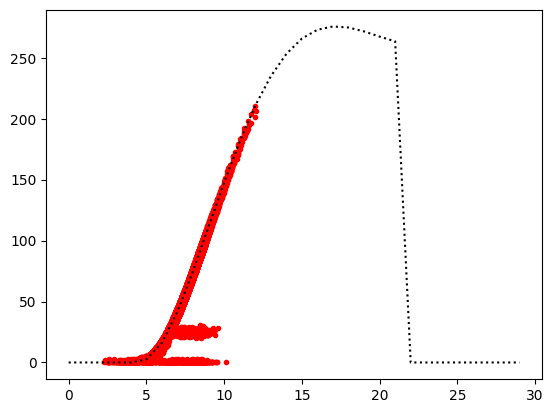

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# load data 
df = pd.read_csv('./wind_turbine.csv') 
expected_power = [wind_turbine_model(x) for x in df.wind_speed_ms] 
reference_power = [wind_turbine_model(x) for x in range(0,30)] 

# show data and reference 
plt.plot(df.wind_speed_ms, df.power_generated_kw,'.r') 
plt.plot(reference_power,'k:') 
plt.show() 

## evaluate ratio 

In [11]:

de=[] 
ts=[] 
for i in range(0,len(expected_power)): 
    mp = df.power_generated_kw[i] 
    ep = expected_power[i] 
    if ep>0 and mp>0: 
        t = df.cycle_10_mins[i] 
        de.append( (mp-ep) / ep ) 
        ts.append(t) 

## predict degradation

In [15]:
 
samples=365*24*6 
year=9

import numpy as np
z = np.polyfit(ts, de, 1) 
print("degradation in %s years will be %.2f %%" % (year, 100*(z[0]*(samples*year) + z[1])) ) 

degradation in 9 years will be -15.73 %
